# Practical 1 : First operations on gray level images 

The objectove of this first practical is to be familiar with the matrix image by loading it, displaying it until the sampling and quantification. 

the most important Python libraries are  : 
- NumPy, for matrices manipulating ;
- Matplotlib for visualizing datas ;


The documentation about Python 3 and the libraries that will be used could be found at : 
- Python 3 : https://docs.python.org/fr/3/
- NumPy : https://docs.scipy.org/doc/numpy-1.15.0/reference/index.html
- Matplotlib : https://matplotlib.org/3.1.1/index.html
- OpenCV (in case): https://docs.opencv.org/4.1.1/index.html 

Start by giving an example of thesome needed libraries:

In [1]:
%matplotlib inline

# Librairies Matplotlib, NumPy et OpenCV
import matplotlib.pyplot as plt
import numpy as np
import cv2 #OpenCV
#
# optional
from sklearn.cluster import MiniBatchKMeans

Here are some data types

| Data type	    | Description |
|---------------|-------------|
| ``bool_``     | Boolean (True or False) stored as a byte |
| ``int_``      | Default integer type (same as C ``long``; normally either ``int64`` or ``int32``)| 
| ``intc``      | Identical to C ``int`` (normally ``int32`` or ``int64``)| 
| ``intp``      | Integer used for indexing (same as C ``ssize_t``; normally either ``int32`` or ``int64``)| 
| ``int8``      | Byte (-128 to 127)| 
| ``int16``     | Integer (-32768 to 32767)|
| ``int32``     | Integer (-2147483648 to 2147483647)|
| ``int64``     | Integer (-9223372036854775808 to 9223372036854775807)| 
| ``uint8``     | Unsigned integer (0 to 255)| 
| ``uint16``    | Unsigned integer (0 to 65535)| 
| ``uint32``    | Unsigned integer (0 to 4294967295)| 
| ``uint64``    | Unsigned integer (0 to 18446744073709551615)| 
| ``float_``    | Shorthand for ``float64``.| 
| ``float16``   | Half precision float: sign bit, 5 bits exponent, 10 bits mantissa| 
| ``float32``   | Single precision float: sign bit, 8 bits exponent, 23 bits mantissa| 
| ``float64``   | Double precision float: sign bit, 11 bits exponent, 52 bits mantissa| 
| ``complex_``  | Shorthand for ``complex128``.| 
| ``complex64`` | Complex number, represented by two 32-bit floats| 
| ``complex128``| Complex number, represented by two 64-bit floats| 

## Ex. 1 : Reading and visualisation of images 

Python is able to read and decode images in BMP, JPEG, PNG, WEBP, PBM, PGM, PPM, SR, RAS and TIFF formats. As explainded in the lecture,  image is represented as a matrix. Before processing an image under Python, you should read it and decode its format in order to transform it in a matrix values.

**1.**

Read the image *lena_gray.tif*, in  *base_images* file, and store it as variable *img*. By using the convenient argument, read the image as it is, in a gray level format or in color format

In [2]:
img = cv2.imread('images/lena_gray.tif', 0) # 
# The 2nd argument refers to the image type coulor

Give the image resolution (dimension) ans type and display it in a figure

In [3]:
rows,cols = img.shape
img_dtype = img.dtype

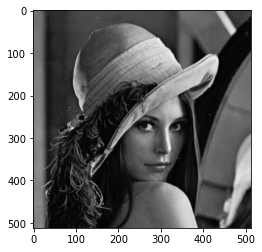

In [4]:
plt.imshow(img,'gray')

---
**2.**

Each matric element refers to a pixel in the image. In case of our variable *img* is in a gray level, Each pixel  position *(i,j)* contains one value  **_I_** *(i,j)*, which is the gray level of the point *(i,j)* (*i* : row number, *j* : column number). 

Give the value of the pixel *(50,100)*.

In [5]:
img[50,100]

53

Recover the top right quarter *lena_gray.tif* and display the result.

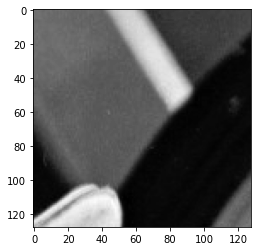

In [6]:
# to complete
# 
RQ = img[:rows//4,3*cols//4:cols]
# 
plt.imshow(RQ,'gray')

---
**3.**

Transpose the variable *img* with *transpose* function of de NumPy, and display the result in gray levels.

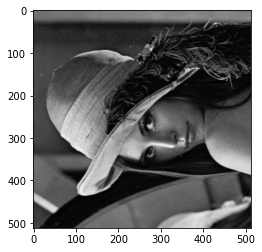

In [8]:
# to complete
img_transposed = np.transpose(img)
plt.imshow(img_transposed,'gray')

Carry out a rotation of  90° to img with the function *rot90* of NumPy and display the results in gray levels.

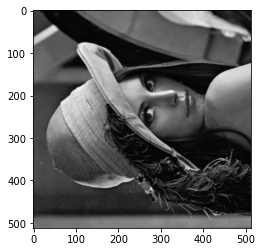

In [9]:
# to complete
# Rotation result
img_rotated = np.rot90(img)
plt.imshow(img_rotated,'gray')

What do you notice about this rotation ?

**_Response :_** Transposing the image makes it rotate -90 degrees and then it adds the horizontal mirroring to it.

---
## Ex 2. Creating and  visualising images

**1.**

Create a matrix *_M_* of *_N x N_* with *N = 256* where the general term **_I_** *(i,j) = j*, display it in gray levels


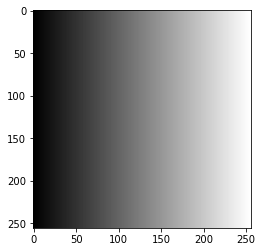

In [10]:
# to complete
# Create the matrix M
M = np.zeros(shape=(256, 256))

for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        M[i][j] = j

# Display M in gray level
plt.imshow(M,'gray')

---
**2.**

So far, we display our images only in gray levels (*'gray'*), however, it is possible to use different palette

Find a palatte list on Matplotlib within this file : https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html.

Show the matrix M with a colour palette (other than gray level)

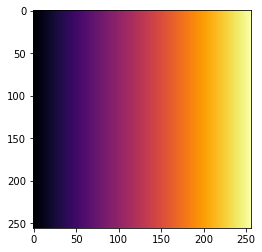

In [11]:
# to complete
plt.imshow(M,'inferno')

---
**3.**

It is as well possible to create our own paette and apply  it on an image. 


We will create an instance *colormap* of a class *ListedColormap*, which coontains thhe matrix *colors*. This matrix is of size *(N,4)*, where N is a natural number of your choiice. The three first colomns (RGB) wil contains real numbers between  0 and 1, the last one represents transparency wil be a vector of length *N* containing the number 1.

Create the matrix *colors*.

Display the matrix $M$ with the created palette 

In [33]:
# A compléter
N = 128
colors = np.zeros(shape=(N,4))
for i in range(N):
    colors[i][0] = i/N
    colors[i][1] = 0
    colors[i][2] = 0
    colors[i][3] = 1
# Vérification de la taille de la matrice colors
#assert colors.shape == (N,4), 'la taille de la matrice doit être (N, 4), N = '+str(N)+' , colors.shape = '+str(colors.shape)

In [34]:
# Création de la colormap
from matplotlib.colors import ListedColormap
colormap = ListedColormap(colors)

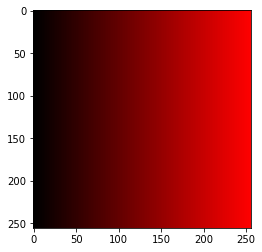

In [35]:
# to complete
# Display the matrix M with the new palette
plt.imshow(M,colormap)

---
**4.**

Vertical, horizontal and diagonal profiles.

In [36]:
vertical_profile = []
horizontal_profile = []
diagonal_profile = []

for i in range(img.shape[0]):
    vertical_profile.append(img[i][127])
    horizontal_profile.append(img[127][i])
    diagonal_profile.append(img[i][i])

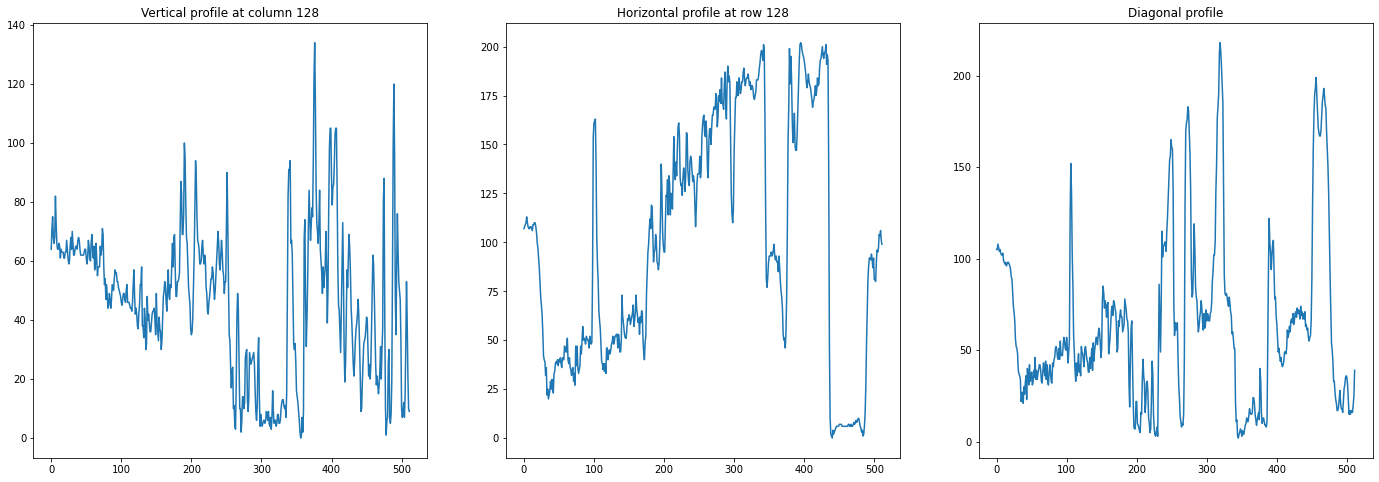

In [116]:
fig, axs = plt.subplots(1,3, figsize=(24, 8))

axs[0].set_title('Vertical profile at column 128')
axs[1].set_title('Horizontal profile at row 128')
axs[2].set_title('Diagonal profile')

axs[0].plot(range(len(vertical_profile)), vertical_profile)
axs[1].plot(range(len(horizontal_profile)), horizontal_profile)
axs[2].plot(range(len(diagonal_profile)), diagonal_profile)

---
## Ex. 3 : Quantification

**1.**

For this part, we will use the image lena_gray.tif. Load this image.

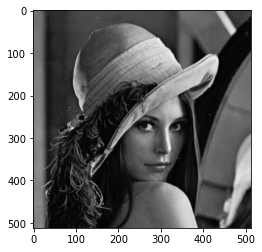

In [40]:
# to complete
lena_gray = cv2.imread('images/lena_gray.tif', 0)

plt.imshow(lena_gray, 'gray')


In order to compress an image, we are going to reduce the number of grey levels through quantization.

Here, you will do a uniform scalar quantization: from an image containing K gray levels, you will reduce this number to N grey levels.

In our case, the quantization is scalar (so, our dictionary will be composed of scalars, i.e. the selected gray levels), and uniform. This means that the quantization step (interval between 2 retained grey levels) is constant. It is thus be necessary to calculate the quantization step according to your image and to the number of desired gray levels N .



In [41]:
def imquantize(img, n_levels):
    k_levels = 256
    coef = (n_levels-1)/(k_levels-1)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img[i][j] = int(np.round(coef*img[i][j]))

We want to evaluate the influence of the quantization step.

Apply the quantification on the image  *lena_gray* to keep 128, 64, 32, 16, 8, 4 and 2 gray levels.

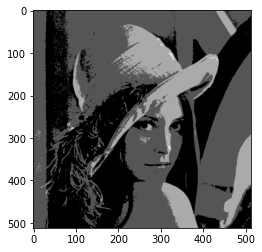

In [47]:
# to complete
import copy

lena_gray_quantized = copy.deepcopy(lena_gray)
imquantize(lena_gray_quantized, 4)
plt.imshow(lena_gray_quantized, 'gray')

Show the corresponding quantified images for each quantification step in order to determine the minimal threshold for which false edges (contours) appear. 

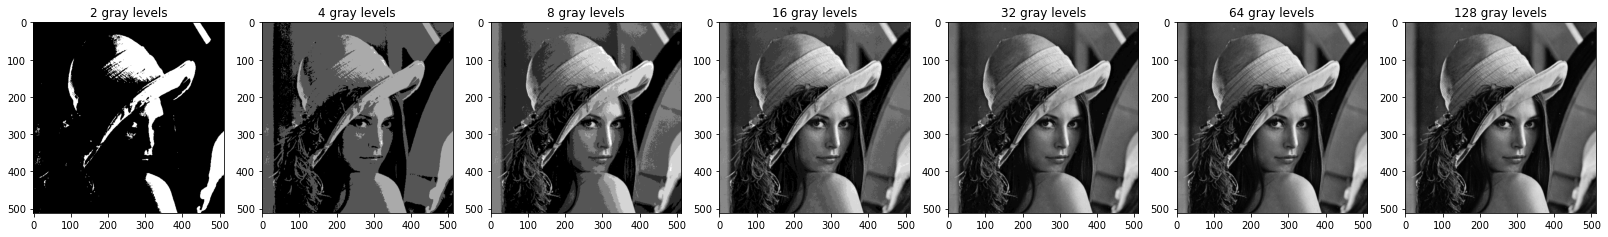

In [126]:
# to complete
# Affichage de l'image originale et des images quantifiées
fig, axs = plt.subplots(1,7, figsize=(28,4))

for i in range(7):
    lena_gray_quantized = copy.deepcopy(lena_gray)
    imquantize(lena_gray_quantized, 2**(i+1))
    
    axs[i].set_title(str(2**(i+1))+' gray levels')
    axs[i].imshow(lena_gray_quantized, 'gray')

Display the histogram of the original image and of the quantified images (for the moment, use the fonction plt.hist of matplotlib by transforming yoour 2D image to a vector by the function ravel).

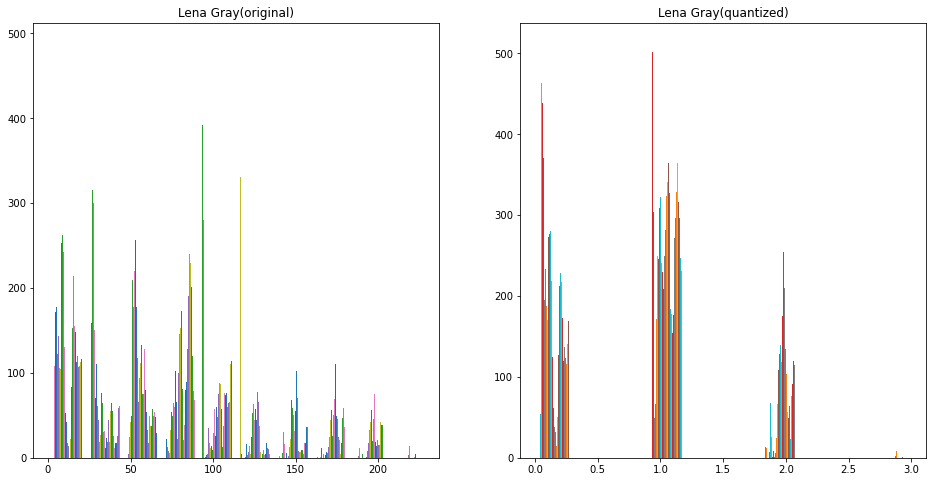

In [120]:
#to complete
fig, axs = plt.subplots(1,2, figsize=(16,8))

axs[0].set_title('Lena Gray(original)')
axs[1].set_title('Lena Gray(quantized)')

axs[0].hist(lena_gray);
axs[1].hist(lena_gray_quantized);

What do you notice regarding the histogram response?

**_Réponse :_** Since the set of colours of the original image maps into the smaller set of colours, it means that there may appear several colours in the original image getting mapped into the same colour in the new image. That is the reason the resolution of the original image has been descreased since the bit depth has been reduced to 2(only 4 colours; histograms describe the same effect visually).

## Ex 4. : Sub-Sampling

**1.**

load the image *mire.png* in gray levels and display it.

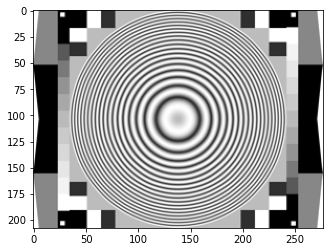

In [105]:
# to complete
# loading
mire = cv2.imread('images/mire.png', 0)
# image show
plt.imshow(mire, 'gray')

Create an sampled version by a factor 2 of this image with a function that you will create. For that, create a new image by taking one pixel over two from the original image. This operation should be done on rows as well as on clumns from the original image. 

In [107]:
# to complete
# subsambling function
def subsampling(img, n):
    height, width = img.shape
    h, w = height//n, width//n
    img_subsampled = np.zeros(shape=(h, w))
    
    for i in range(h):
        for j in range(w):
            total = 0
            for k1 in range(n):
                for k2 in range(n):
                    if n*i+k1 >= height or n*j+k2 >= width:
                        continue
                    total += img[n*i+k1][n*j+k2]
            img_subsampled[i][j] = total / n**2
    return img_subsampled

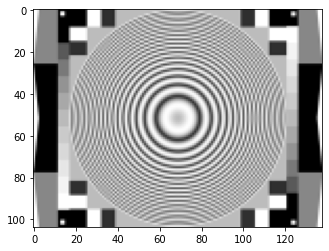

In [108]:
# to complete
# Display the image with a factor 2
mire_2x = subsampling(mire, 2)
plt.imshow(mire_2x, 'gray')

---
**2.**

Créez la même fonction sans boucle grâce à l'indexation des tableaux NumPy.

In [ ]:
# A compléter
# Fonction de sous échantillonage sans boucle
def subsampling2():
    ...

Describe the effect of the subsampling

**_Réponse :_** It makes an image become smaller in size and have a potential loss while subsampled.

---
**3.**

Do the same operation with a factor 4 (by changing a parameter in the above created function).

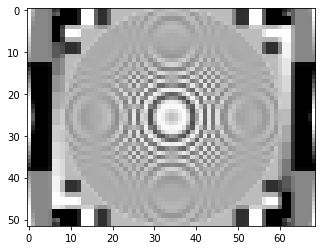

In [109]:
# to complete
# Display
mire_4x = subsampling(mire, 4)
plt.imshow(mire_4x, 'gray')

**_Réponse :_** The quality of an image decreases while zooming in and there may appear some artifacts depending on the subsampling parameter(i.e. 2x or 4x zoom).

**4.**

Use a new kinf ood subsampling by taking the maximum pixel over four in the image. This operation is called max-pooling

Discuss the difference with the first sampling